In [37]:
import matplotlib.pyplot as plt 
from sympy import *
import numpy as np
PI = 3.14159265359

In [2]:
xij, yij, zij = symbols("xij, yij, zij", real=True) 
b, eta = symbols("b, eta", real=True, positive=True)

# indices for summation:
## Caution, cannot use lambda, instead use Lambda
## do not use eta as index, it's the viscosity
alpha, beta, gamma, gamma1, gamma2, gamma3, gamma4, kappa, kappa1, kappa2, mu, nu, nu1, nu2, Lambda, eta2, zeta, sigma = symbols(
    'alpha, beta, gamma, gamma1, gamma2, gamma3, gamma4, kappa, kappa1, kappa2, mu, nu, nu1, nu2, Lambda, eta2, zeta, sigma', integer=True)

#new symbols for periodic calculation: boxSize, xi (convergence parameter)
L, xi = symbols("L, xi", real=True, positive=True)
kx, ky, kz = symbols("kx, ky, kz", real=True) 

rij = Matrix([xij, yij, zij])
k = Matrix([kx, ky, kz])
kDOTrij = xij*kx + yij*ky + zij*kz
norm_rij = sqrt(xij**2 + yij**2 + zij**2)
norm_k = sqrt(kx**2 + ky**2 + kz**2)

k0 = 2*pi/L

def norm(r):
    result=0
    for i in range(3):
        result += r[i]**2
    return sqrt(result)

KroneckerDelta = eye(3)

def eps(alpha, beta, gamma):
    return LeviCivita(alpha,beta,gamma)

In [ ]:
##element 19 of GH1sF and set force(2)=-1

In [94]:
bla =((6.0952380952381*L**6*b**4*xi**11*exp(-L**2*xi**2)/sqrt(PI) - 24.3809523809525*L**6*b**4*xi**11*exp(-2*L**2*xi**2)/sqrt(PI) - 146.285714285714*L**6*b**4*xi**11*exp(-3*L**2*xi**2)/sqrt(PI) - 36.5714285714286*L**4*b**4*xi**9*exp(-L**2*xi**2)/sqrt(PI) + 73.142857142858*L**4*b**4*xi**9*exp(-2*L**2*xi**2)/sqrt(PI) + 292.571428571428*L**4*b**4*xi**9*exp(-3*L**2*xi**2)/sqrt(PI) + 6.39999999999999*L**4*b**2*xi**7*exp(-L**2*xi**2)/sqrt(PI) - 12.8*L**4*b**2*xi**7*exp(-2*L**2*xi**2)/sqrt(PI) - 51.2*L**4*b**2*xi**7*exp(-3*L**2*xi**2)/sqrt(PI) + 3.04761904761903*L**2*b**4*xi**7*exp(-L**2*xi**2)/sqrt(PI) - 3.04761904762093*L**2*b**4*xi**7*exp(-2*L**2*xi**2)/sqrt(PI) - 8.12698412698488*L**2*b**4*xi**7*exp(-3*L**2*xi**2)/sqrt(PI) - 3.19999999999996*L**2*b**2*xi**5*exp(-L**2*xi**2)/sqrt(PI) + 3.20000000000014*L**2*b**2*xi**5*exp(-2*L**2*xi**2)/sqrt(PI) + 8.53333333333343*L**2*b**2*xi**5*exp(-3*L**2*xi**2)/sqrt(PI) + 10.6666666666671*b**4*xi**5*exp(-L**2*xi**2)/sqrt(PI) - 5.33333333333216*b**4*xi**5*exp(-2*L**2*xi**2)/sqrt(PI) - 9.4814814814811*b**4*xi**5*exp(-3*L**2*xi**2)/sqrt(PI) - 8.00000000000002*b**2*xi**3*exp(-L**2*xi**2)/sqrt(PI) + 3.99999999999994*b**2*xi**3*exp(-2*L**2*xi**2)/sqrt(PI) + 7.1111111111111*b**2*xi**3*exp(-3*L**2*xi**2)/sqrt(PI) + 26.6666666666665*b**4*xi**3*exp(-L**2*xi**2)/(sqrt(PI)*L**2) - 6.66666666666676*b**4*xi**3*exp(-2*L**2*xi**2)/(sqrt(PI)*L**2) - 7.90123456790138*b**4*xi**3*exp(-3*L**2*xi**2)/(sqrt(PI)*L**2) - 12.0*b**2*xi*exp(-L**2*xi**2)/(sqrt(PI)*L**2) + 3.0*b**2*xi*exp(-2*L**2*xi**2)/(sqrt(PI)*L**2) + 3.55555555555555*b**2*xi*exp(-3*L**2*xi**2)/(sqrt(PI)*L**2) - 5.99999999999999*b**2*erfc(L*xi)/L**3 + 0.749999999999998*sqrt(2)*b**2*erfc(sqrt(2)*L*xi)/L**3 + 0.592592592592592*sqrt(3)*b**2*erfc(sqrt(3)*L*xi)/L**3 + 40.0*b**4*xi*exp(-L**2*xi**2)/(sqrt(PI)*L**4) - 5.0*b**4*xi*exp(-2*L**2*xi**2)/(sqrt(PI)*L**4) - 3.95061728395052*b**4*xi*exp(-3*L**2*xi**2)/(sqrt(PI)*L**4) + 20.0*b**4*erfc(L*xi)/L**5 - 1.25*sqrt(2)*b**4*erfc(sqrt(2)*L*xi)/L**5 - 0.658436213991761*sqrt(3)*b**4*erfc(sqrt(3)*L*xi)/L**5)/(8*PI*eta) + (0.0444444444444444*b**2*exp(-12.0*PI**2/(L**2*xi**2))/eta + 0.192592592592592*b**2*exp(-9.0*PI**2/(L**2*xi**2))/eta + 0.0500000000000003*b**2*exp(-8.0*PI**2/(L**2*xi**2))/eta + 0.2*b**2*exp(-6.0*PI**2/(L**2*xi**2))/eta - 0.159999999999999*b**2*exp(-5.0*PI**2/(L**2*xi**2))/eta - 0.2*b**2*exp(-4.0*PI**2/(L**2*xi**2))/eta + 0.355555555555555*b**2*exp(-3.0*PI**2/(L**2*xi**2))/eta + 0.200000000000001*b**2*exp(-2.0*PI**2/(L**2*xi**2))/eta - 0.400000000000001*b**2*exp(-1.0*PI**2/(L**2*xi**2))/eta - 0.507936507936508*PI**2*b**4*exp(-12.0*PI**2/(L**2*xi**2))/(L**2*eta) - 1.65079365079365*PI**2*b**4*exp(-9.0*PI**2/(L**2*xi**2))/(L**2*eta) - 0.380952380952381*PI**2*b**4*exp(-8.0*PI**2/(L**2*xi**2))/(L**2*eta) - 1.14285714285714*PI**2*b**4*exp(-6.0*PI**2/(L**2*xi**2))/(L**2*eta) + 0.761904761904761*PI**2*b**4*exp(-5.0*PI**2/(L**2*xi**2))/(L**2*eta) + 0.761904761904766*PI**2*b**4*exp(-4.0*PI**2/(L**2*xi**2))/(L**2*eta) - 1.01587301587302*PI**2*b**4*exp(-3.0*PI**2/(L**2*xi**2))/(L**2*eta) - 0.380952380952382*PI**2*b**4*exp(-2.0*PI**2/(L**2*xi**2))/(L**2*eta) + 0.380952380952381*PI**2*b**4*exp(-1.0*PI**2/(L**2*xi**2))/(L**2*eta) + 0.533333333333333*PI**2*b**2*exp(-12.0*PI**2/(L**2*xi**2))/(L**2*eta*xi**2) + 1.73333333333333*PI**2*b**2*exp(-9.0*PI**2/(L**2*xi**2))/(L**2*eta*xi**2) + 0.400000000000002*PI**2*b**2*exp(-8.0*PI**2/(L**2*xi**2))/(L**2*eta*xi**2) + 1.2*PI**2*b**2*exp(-6.0*PI**2/(L**2*xi**2))/(L**2*eta*xi**2) - 0.799999999999997*PI**2*b**2*exp(-5.0*PI**2/(L**2*xi**2))/(L**2*eta*xi**2) - 0.800000000000001*PI**2*b**2*exp(-4.0*PI**2/(L**2*xi**2))/(L**2*eta*xi**2) + 1.06666666666667*PI**2*b**2*exp(-3.0*PI**2/(L**2*xi**2))/(L**2*eta*xi**2) + 0.400000000000002*PI**2*b**2*exp(-2.0*PI**2/(L**2*xi**2))/(L**2*eta*xi**2) - 0.400000000000001*PI**2*b**2*exp(-1.0*PI**2/(L**2*xi**2))/(L**2*eta*xi**2) - 6.0952380952381*PI**4*b**4*exp(-12.0*PI**2/(L**2*xi**2))/(L**4*eta*xi**2) - 14.8571428571428*PI**4*b**4*exp(-9.0*PI**2/(L**2*xi**2))/(L**4*eta*xi**2) - 3.04761904761905*PI**4*b**4*exp(-8.0*PI**2/(L**2*xi**2))/(L**4*eta*xi**2) - 6.85714285714286*PI**4*b**4*exp(-6.0*PI**2/(L**2*xi**2))/(L**4*eta*xi**2) + 3.80952380952381*PI**4*b**4*exp(-5.0*PI**2/(L**2*xi**2))/(L**4*eta*xi**2) + 3.04761904761906*PI**4*b**4*exp(-4.0*PI**2/(L**2*xi**2))/(L**4*eta*xi**2) - 3.04761904761905*PI**4*b**4*exp(-3.0*PI**2/(L**2*xi**2))/(L**4*eta*xi**2) - 0.761904761904764*PI**4*b**4*exp(-2.0*PI**2/(L**2*xi**2))/(L**4*eta*xi**2) + 0.380952380952381*PI**4*b**4*exp(-1.0*PI**2/(L**2*xi**2))/(L**4*eta*xi**2) + 12.8*PI**4*b**2*exp(-12.0*PI**2/(L**2*xi**2))/(L**4*eta*xi**4) + 31.2*PI**4*b**2*exp(-9.0*PI**2/(L**2*xi**2))/(L**4*eta*xi**4) + 6.40000000000004*PI**4*b**2*exp(-8.0*PI**2/(L**2*xi**2))/(L**4*eta*xi**4) + 14.4*PI**4*b**2*exp(-6.0*PI**2/(L**2*xi**2))/(L**4*eta*xi**4) - 7.99999999999997*PI**4*b**2*exp(-5.0*PI**2/(L**2*xi**2))/(L**4*eta*xi**4) - 6.40000000000001*PI**4*b**2*exp(-4.0*PI**2/(L**2*xi**2))/(L**4*eta*xi**4) + 6.39999999999999*PI**4*b**2*exp(-3.0*PI**2/(L**2*xi**2))/(L**4*eta*xi**4) + 1.60000000000001*PI**4*b**2*exp(-2.0*PI**2/(L**2*xi**2))/(L**4*eta*xi**4) - 0.800000000000001*PI**4*b**2*exp(-1.0*PI**2/(L**2*xi**2))/(L**4*eta*xi**4) - 146.285714285714*PI**6*b**4*exp(-12.0*PI**2/(L**2*xi**2))/(L**6*eta*xi**4) - 267.428571428571*PI**6*b**4*exp(-9.0*PI**2/(L**2*xi**2))/(L**6*eta*xi**4) - 48.7619047619048*PI**6*b**4*exp(-8.0*PI**2/(L**2*xi**2))/(L**6*eta*xi**4) - 82.2857142857144*PI**6*b**4*exp(-6.0*PI**2/(L**2*xi**2))/(L**6*eta*xi**4) + 38.095238095238*PI**6*b**4*exp(-5.0*PI**2/(L**2*xi**2))/(L**6*eta*xi**4) + 24.3809523809525*PI**6*b**4*exp(-4.0*PI**2/(L**2*xi**2))/(L**6*eta*xi**4) - 18.2857142857143*PI**6*b**4*exp(-3.0*PI**2/(L**2*xi**2))/(L**6*eta*xi**4) - 3.04761904761906*PI**6*b**4*exp(-2.0*PI**2/(L**2*xi**2))/(L**6*eta*xi**4) + 0.761904761904762*PI**6*b**4*exp(-1.0*PI**2/(L**2*xi**2))/(L**6*eta*xi**4))/L**3)*(-1)

In [96]:
blasubs = bla.subs({b:1, eta:1/6, xi:sqrt(PI)/L})

In [103]:
blasubs

-(-2.25256853694303 + 18.7894151943723/L**2)/L**3 - 1.13647376331911/L**3 - 0.17904931097837*sqrt(2)*erfc(1.77245385090557*sqrt(2))/L**3 - 0.14147106052612*sqrt(3)*erfc(1.77245385090557*sqrt(3))/L**3 + 0.157190067251242*sqrt(3)*erfc(1.77245385090557*sqrt(3))/L**5 + 0.298415518297284*sqrt(2)*erfc(1.77245385090557*sqrt(2))/L**5 + 14.660112279198/L**5

In [98]:
interval = np.linspace(1.8, 8.7)
evaluation = np.zeros(len(interval))
i = 0
for ll in interval:
    evaluation[i] = blasubs.subs(L,ll).evalf()
    i+=1

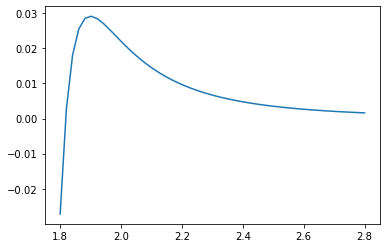

In [99]:
plt.plot(Llist,evaluation)

In [100]:
solve(diff(blasubs, L), L)

[2.48326641081790]

In [ ]:
##somehow Krylov solver is taking absolute value of element 19 of G3s1s?